In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from sklearn import pipeline, preprocessing, neighbors, model_selection
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.learning_curve import learning_curve
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from patsy import dmatrices
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


/Users/anthonykhoudary/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/anthonykhoudary/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
columns_lower=[x.lower() for x in df.columns]

In [4]:
df.columns=columns_lower #roundabout way of making columns lowercase

In [5]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies                 768 non-null int64
glucose                     768 non-null int64
bloodpressure               768 non-null int64
skinthickness               768 non-null int64
insulin                     768 non-null int64
bmi                         768 non-null float64
diabetespedigreefunction    768 non-null float64
age                         768 non-null int64
outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df['outcome'].value_counts() #about twice as many negatives as positives

0    500
1    268
Name: outcome, dtype: int64

In [8]:
x=df.drop('outcome',axis=1)
y=df['outcome']

In [9]:
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=4444, test_size=0.3)


In [22]:
logr_pipe=pipeline.Pipeline([
    ('scaler',preprocessing.StandardScaler()),
    ('logr',linear_model.LogisticRegression())
])

In [23]:
logr_pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [24]:
logr_pipe.score(x_train,y_train)

0.7746741154562383

In [25]:
logr_pipe.score(x_test,y_test) ###not bad, log regr good for interpretability

0.7705627705627706

In [26]:
knn_pipe=pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('knn', neighbors.KNeighborsClassifier())
])

In [27]:
kfold=model_selection.StratifiedKFold(n_splits=10, shuffle=True)


In [28]:
k_range=np.arange(1,20)
k_scores=[]
n_cv=10

for k in k_range:
    knn_pipe.set_params(knn__n_neighbors=k)
    test_scores=[]
    for i in range(n_cv):
        cv_results=model_selection.cross_validate(knn_pipe,x_train,y_train,cv=kfold)
        test_scores.append(np.mean(cv_results['test_score']))
    k_scores.append(np.mean(test_scores))

In [29]:
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [31]:
k_scores ##not really performing better

[0.689964790625168,
 0.7167481051443316,
 0.7370428156748912,
 0.7389157662742568,
 0.7390305327097779,
 0.7429614847067677,
 0.7456363220985862,
 0.7457182981239585,
 0.7408422028705048,
 0.7471665860345106,
 0.7543217491802398,
 0.757879911842176,
 0.7614507068752351,
 0.7560018545395903,
 0.7637489920980487,
 0.7658350803633822,
 0.7713685964629361,
 0.762889184540128,
 0.7620675428694297]

In [35]:
def quick_test(model, x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, x, y, n=10):
    return np.mean([quick_test(model, x, y) for j in range(n)])

In [46]:
randomforest=RandomForestClassifier(n_estimators=10)

In [47]:
quick_test_afew_times(randomforest,x,y) ##not better than logistic

0.7489177489177488

In [48]:
from sklearn import naive_bayes, metrics


In [49]:
naive_bayes_gaussian_pipe=pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('nb_gaussian', naive_bayes.GaussianNB())
])


In [50]:
naive_bayes_gaussian_pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('nb_gaussian', GaussianNB(priors=None))])

In [51]:
naive_bayes_gaussian_pipe.score(x_train,y_train)

0.7616387337057728

In [52]:
naive_bayes_gaussian_pipe.score(x_test,y_test)

0.7402597402597403

In [10]:
from sklearn.ensemble import AdaBoostClassifier

In [12]:
ada_pipe=pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('ada_boost', AdaBoostClassifier(base_estimator=linear_model.LogisticRegression(),n_estimators=500))
])

In [15]:
stratified_kfold_cv(ada_pipe,x,y)

'Average Score: 0.77028545941124'

In [18]:
ada_pipe2=pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('ada_boost', AdaBoostClassifier(base_estimator=RandomForestClassifier(),n_estimators=100))
])

In [19]:
stratified_kfold_cv(ada_pipe2,x,y)

'Average Score: 0.7339034318701488'

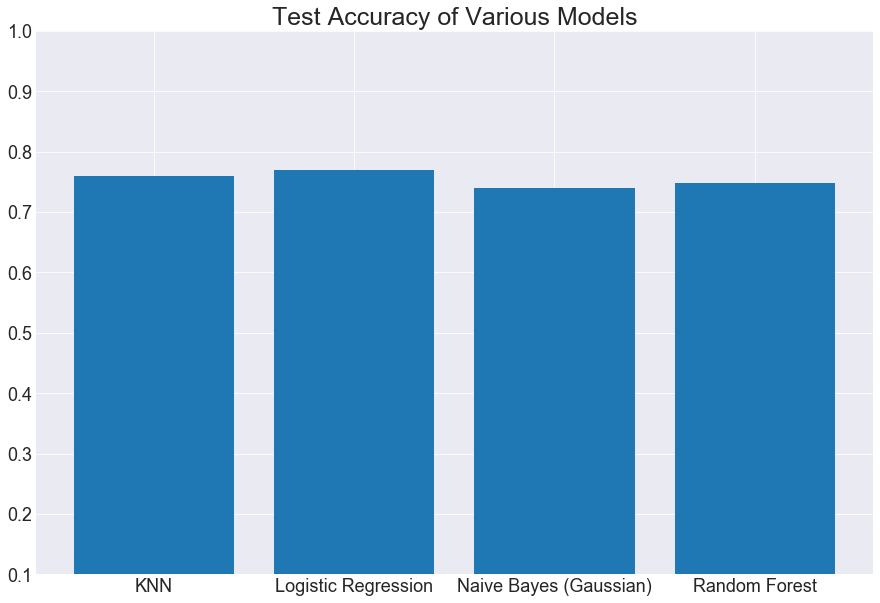

In [51]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
plt.bar(['Logistic Regression','KNN','Random Forest','Naive Bayes (Gaussian)'],[0.770,0.760,0.748,0.74])
plt.ylim(0.1,1)
plt.title('Test Accuracy of Various Models',size=25)
plt.yticks(size=18)
plt.xticks(size=18)
plt.savefig('model_selection.pdf')

# Logistic Regression Seems to be The Way to Go, Now Onto Model Optimization

In [64]:
kfold=model_selection.StratifiedKFold(n_splits=10, shuffle=True)

In [14]:
def stratified_kfold_cv(model,x,y,n_cv=10):
    from sklearn import model_selection
    import numpy as np
    
    x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y)
    kfold=model_selection.StratifiedKFold(n_splits=10, shuffle=True)
    
    scores=[]
    for i in range(n_cv):
        cv_results=model_selection.cross_validate(model, x_train,y_train, cv=kfold)
        scores.append(np.mean(cv_results['test_score']))
        
    return 'Average Score: '+str(np.mean(scores))
        
    

In [71]:
stratified_kfold_cv(logr_pipe, x,y)

'Average Score: 0.784338901022281'

In [74]:
stratified_kfold_cv(randomforest,x,y,n_cv=20)

'Average Score: 0.7322368421052632'

### Stratified k_fold cv works, now onto logistic regression optimization

#### first, lets do a grid search for best parameters

In [79]:
logr_pipe.get_params()

{'logr': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'logr__C': 1.0,
 'logr__class_weight': None,
 'logr__dual': False,
 'logr__fit_intercept': True,
 'logr__intercept_scaling': 1,
 'logr__max_iter': 100,
 'logr__multi_class': 'ovr',
 'logr__n_jobs': 1,
 'logr__penalty': 'l2',
 'logr__random_state': None,
 'logr__solver': 'liblinear',
 'logr__tol': 0.0001,
 'logr__verbose': 0,
 'logr__warm_start': False,
 'memory': None,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('logr',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scal

In [83]:
param_grid={
    'logr__penalty':['l1','l2'],
    'logr__class_weight':[None,'balanced'],
    "scaler": [preprocessing.StandardScaler(), preprocessing.MinMaxScaler(), None]
}

In [84]:
grid_model=model_selection.GridSearchCV(logr_pipe, param_grid,cv=10,scoring='accuracy')

In [85]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logr__penalty': ['l1', 'l2'], 'logr__class_weight': [None, 'balanced'], 'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), MinMaxScaler(copy=True, feature_range=(0, 1)), None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [86]:
grid_model.best_score_

0.7690875232774674

In [87]:
grid_model.best_params_

{'logr__class_weight': None,
 'logr__penalty': 'l1',
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [92]:
grid_model.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [97]:
grid_model.score(x_test,y_test)

0.7748917748917749

In [99]:
logr_pipe.score(x_test,y_test)

0.7705627705627706

### Trying to hyper tune parameters doesn't seem to give a better score, let's try enseble methods

In [100]:
from sklearn.ensemble import BaggingClassifier

In [102]:
bagged_logr_pipe=BaggingClassifier(base_estimator=logr_pipe, n_estimators=20)

In [103]:
bagged_logr_pipe.fit(x_train,y_train)

BaggingClassifier(base_estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [104]:
bagged_logr_pipe.score(x_train,y_train)

0.776536312849162

In [105]:
bagged_logr_pipe.score(x_test,y_test)

0.7748917748917749

### Since the score isn't improving very much, for the sake of interpretability, we'll stick with the simple logistic regression

In [111]:
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, logr_pipe.predict(x_test)))
print(metrics.classification_report(y_test, logr_pipe.predict(x_test)))

Accuracy: 0.771
             precision    recall  f1-score   support

          0       0.83      0.82      0.83       152
          1       0.66      0.67      0.67        79

avg / total       0.77      0.77      0.77       231



In [112]:
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, bagged_logr_pipe.predict(x_test)))
print(metrics.classification_report(y_test, bagged_logr_pipe.predict(x_test)))

Accuracy: 0.775
             precision    recall  f1-score   support

          0       0.83      0.83      0.83       152
          1       0.67      0.67      0.67        79

avg / total       0.77      0.77      0.77       231



In [116]:
def plot_confusion(clf, x, y):
    
    y_pred = clf.predict(x)
    c_mat = metrics.confusion_matrix(y,y_pred)
    labels = unique(y)
    sns.heatmap(
        sqrt(c_mat),
        annot=c_mat,
        xticklabels=labels,
        yticklabels=labels,
        cbar=False);
    ylabel("true label")
    xlabel("predicted label")

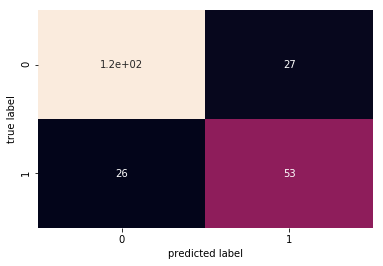

In [117]:
import seaborn as sns
plot_confusion(logr_pipe, x_test,y_test)

### Let's see if we can improve things by looking more at our original data

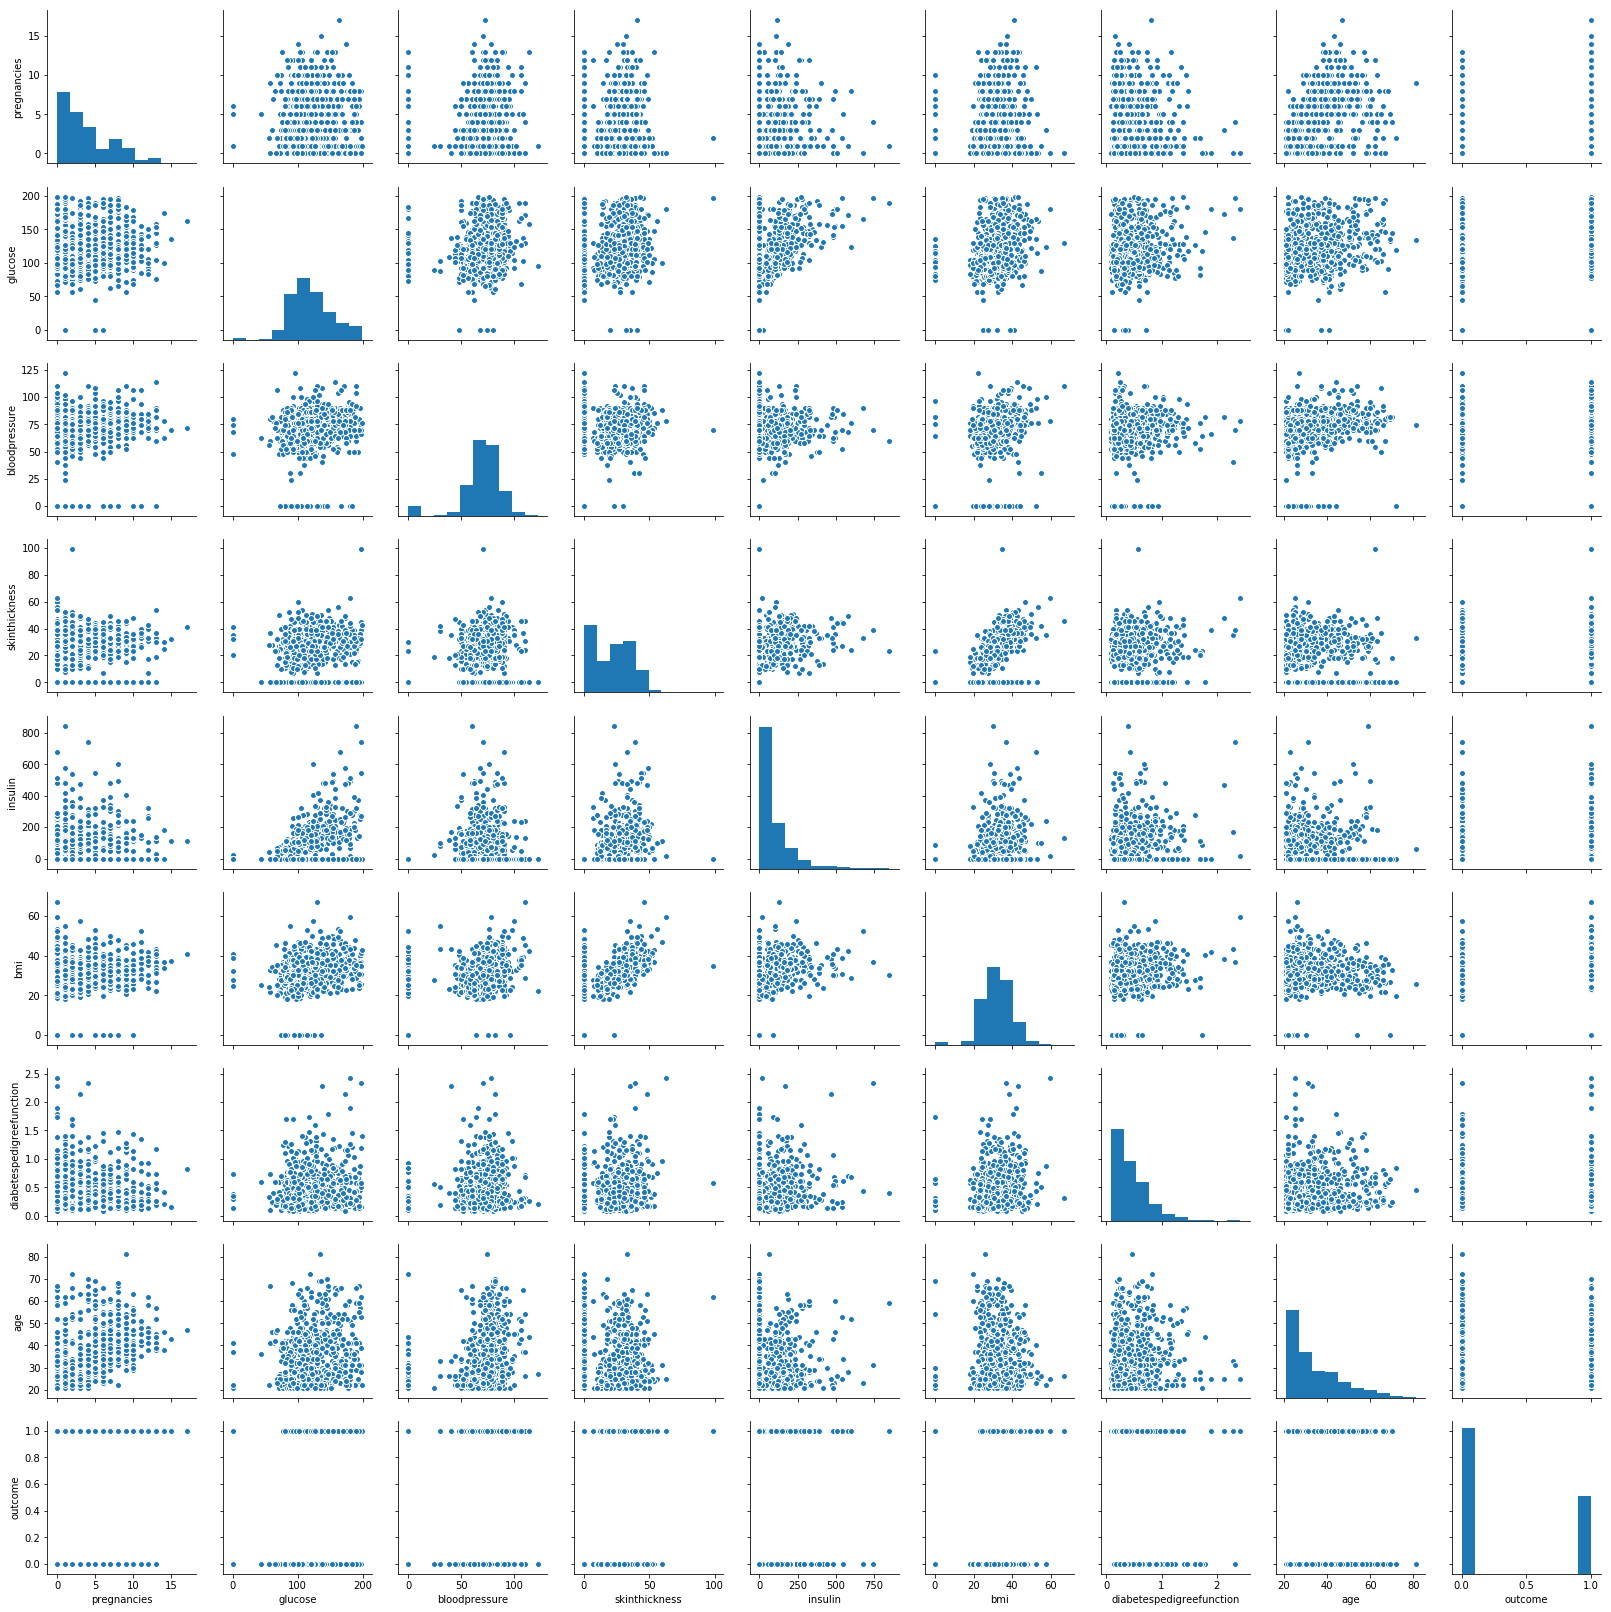

In [119]:
sns.pairplot(df) 

In [134]:
for item in df:
    print (df[item].value_counts()) ###many columns with values of 0, need to remedy this

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: pregnancies, dtype: int64
100    17
99     17
129    14
125    14
111    14
106    14
95     13
108    13
105    13
102    13
112    13
122    12
109    12
107    11
117    11
90     11
120    11
114    11
124    11
128    11
119    11
115    10
84     10
91      9
92      9
123     9
146     9
126     9
103     9
101     9
       ..
75      2
76      2
77      2
170     2
195     2
57      2
174     2
175     2
188     2
153     2
159     2
62      1
72      1
56      1
44      1
65      1
61      1
198     1
67      1
190     1
149     1
191     1
186     1
182     1
178     1
177     1
172     1
169     1
160     1
199     1
Name: glucose, Length: 136, dtype: int64
70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     

In [140]:
def replace_zero(df, field, target):
    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
    df.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
    df.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0] 

In [141]:
###someone made a handy function to replace zero values with mean for each class

In [145]:
cols=['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']

In [146]:
for col in cols:
    replace_zero(df, col, 'outcome')

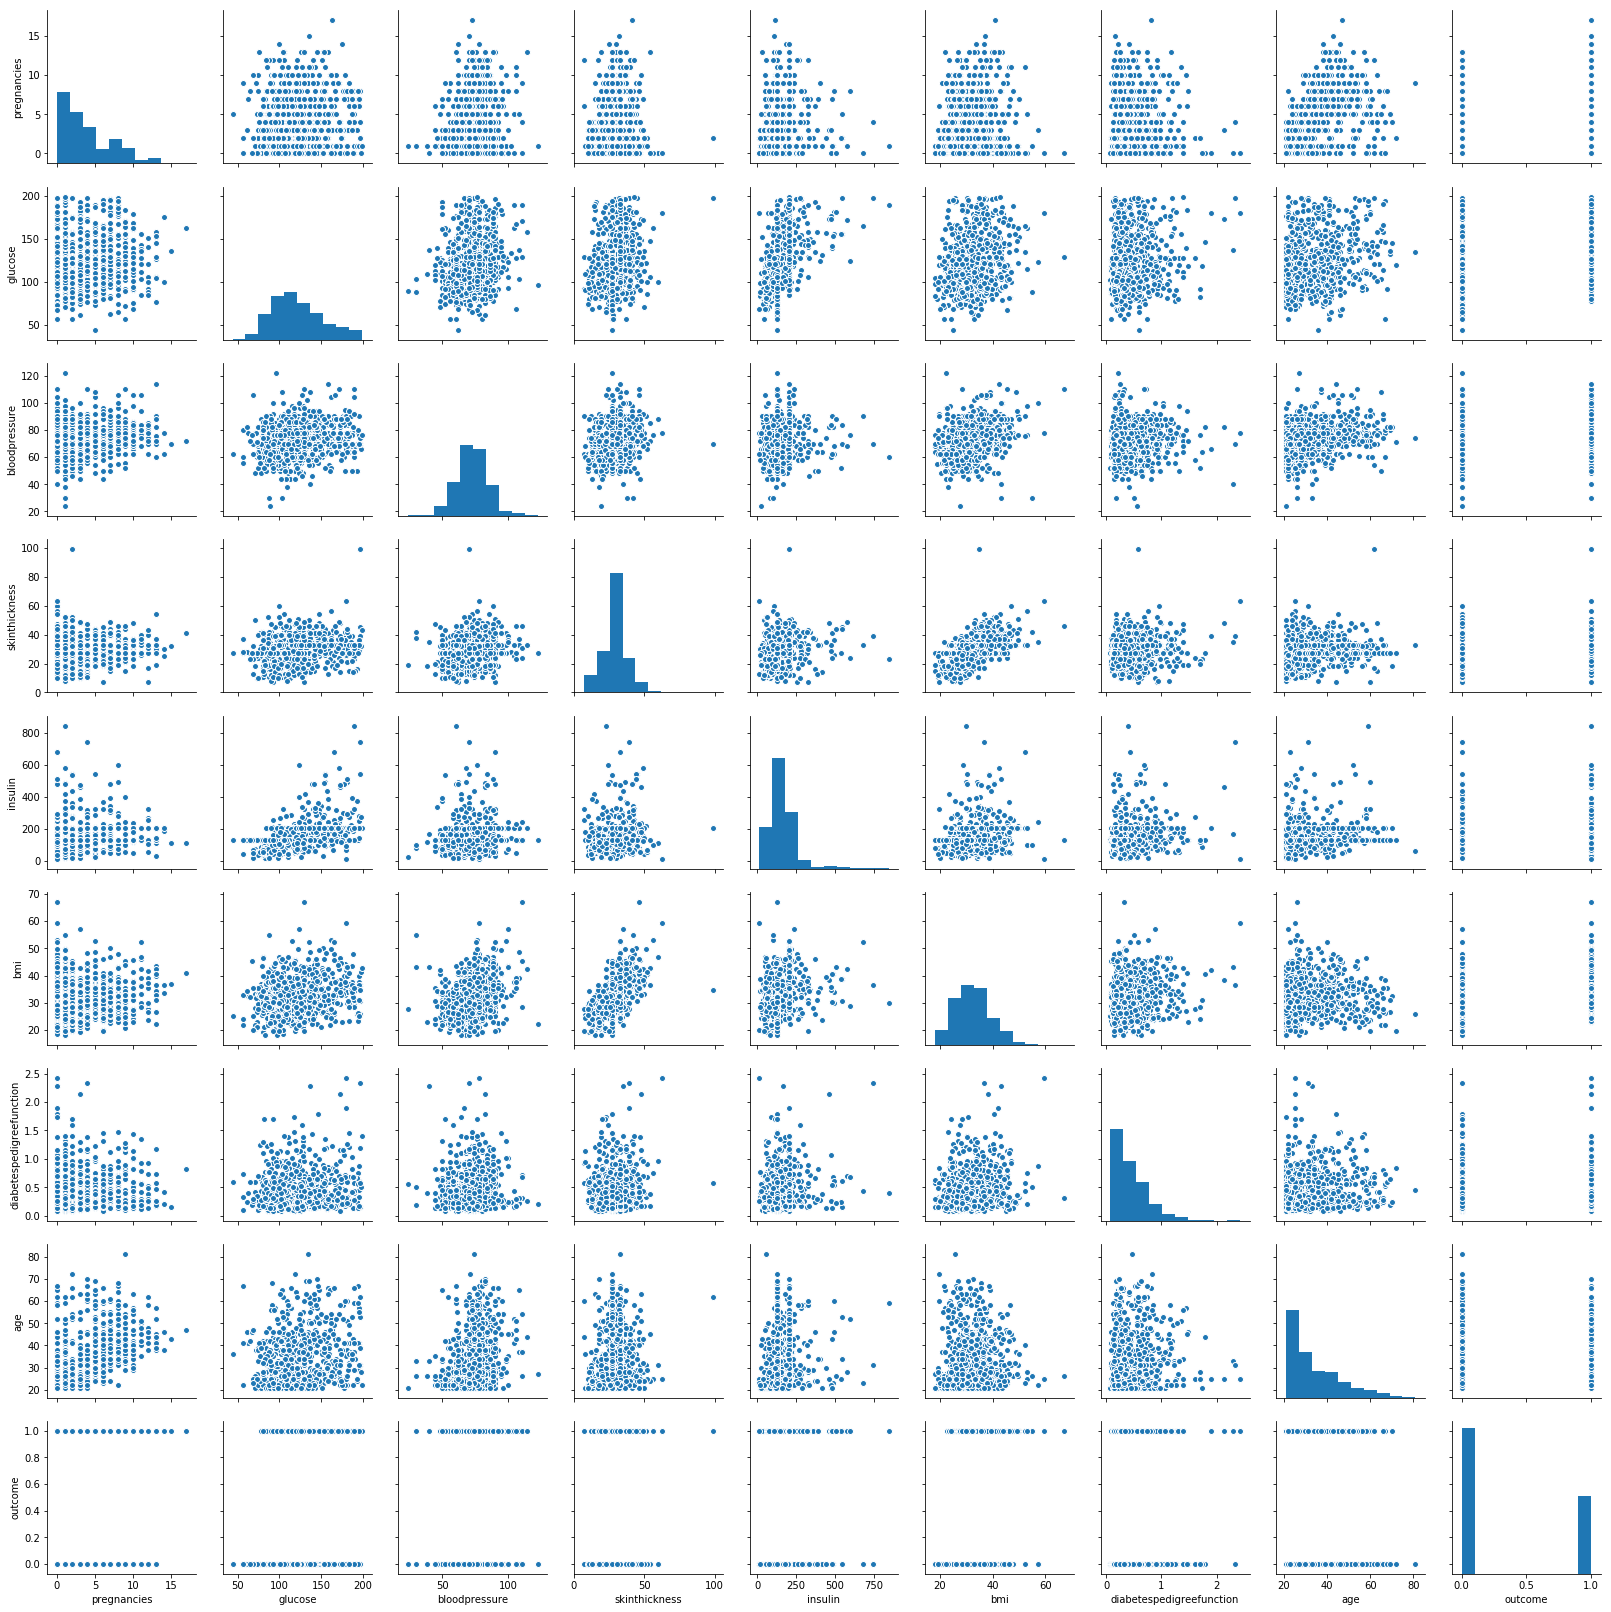

In [151]:
sns.pairplot(df)

In [158]:
df.corr()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.129867,0.208935,0.094172,0.093546,0.024127,-0.033523,0.544341,0.221898
glucose,0.129867,1.000000,0.224356,0.235040,0.497789,0.235253,0.138125,0.268566,0.495954
bloodpressure,0.208935,0.224356,1.000000,0.203453,0.099996,0.286518,-0.002264,0.324439,0.175087
skinthickness,0.094172,0.235040,0.203453,1.000000,0.212573,0.565443,0.102426,0.135916,0.308094
insulin,0.093546,0.497789,0.099996,0.212573,1.000000,0.231533,0.121716,0.165149,0.410918
bmi,0.024127,0.235253,0.286518,0.565443,0.231533,1.000000,0.152530,0.027578,0.315271
diabetespedigreefunction,-0.033523,0.138125,-0.002264,0.102426,0.121716,0.152530,1.000000,0.033561,0.173844
age,0.544341,0.268566,0.324439,0.135916,0.165149,0.027578,0.033561,1.000000,0.238356
outcome,0.221898,0.495954,0.175087,0.308094,0.410918,0.315271,0.173844,0.238356,1.000000


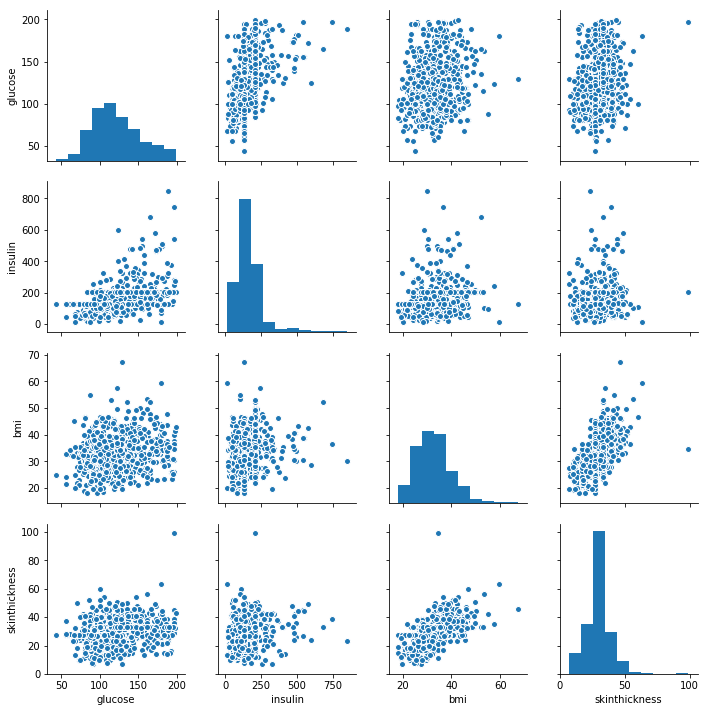

In [160]:
sns.pairplot(df,vars=['glucose','insulin','bmi','skinthickness'])

### everything looks a little better now, let's remodel

In [153]:
x=df.drop('outcome', axis=1)
y=df['outcome']

In [154]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y)

In [156]:
stratified_kfold_cv(logr_pipe,x,y)

'Average Score: 0.7805072441477745'

### Yay, we did slightly better!!!!, now let's get coeffcients!

In [179]:
coefs1=logr_pipe.named_steps['logr'].coef_

In [180]:
coefs1

array([[ 0.37688503,  1.12208795, -0.35780153, -0.07707984, -0.14055351,
         0.68178783,  0.4452632 ,  0.2432251 ]])

In [181]:
logr_pipe_full_coefs=dict(zip(df.columns,coefs1[0]))

In [182]:
logr_pipe_full_coefs

{'age': 0.24322509760853556,
 'bloodpressure': -0.3578015264759849,
 'bmi': 0.6817878297007671,
 'diabetespedigreefunction': 0.4452631989268334,
 'glucose': 1.1220879485482262,
 'insulin': -0.1405535107869312,
 'pregnancies': 0.3768850312370271,
 'skinthickness': -0.07707983594296203}

In [183]:
logr_pipe.score(x_test,y_test)

0.7864583333333334

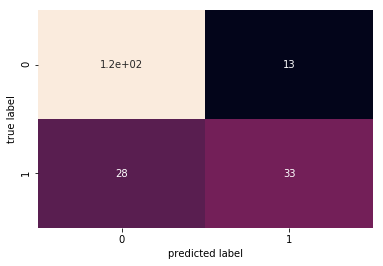

In [186]:
plot_confusion(logr_pipe, x_test,y_test)

In [197]:
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, bagged_logr_pipe.predict(x_test)))
print(metrics.classification_report(y_test, bagged_logr_pipe.predict(x_test)))

Accuracy: 0.792
             precision    recall  f1-score   support

          0       0.81      0.91      0.86       131
          1       0.73      0.54      0.62        61

avg / total       0.79      0.79      0.78       192



### Now lets start taking out some features that may be colinear

**begin by removing skinthickness (colinear with bmi)**

In [230]:
x2=df.drop(['outcome','skinthickness'],axis=1)
y2=df['outcome']

In [243]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2)

In [321]:
logr_pipe.fit(x2_train,y2_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [322]:
logr_pipe.score(x2_test,y2_test)

0.765625

In [246]:
coefs2=logr_pipe.named_steps['logr'].coef_

In [247]:
logr_pipe_coefs2=dict(zip(x2.columns,coefs2[0]))

In [248]:
logr_pipe_coefs2

{'age': 0.16569378954213235,
 'bloodpressure': 0.09657952920992799,
 'bmi': 0.4028482407411709,
 'diabetespedigreefunction': 0.3498899932447197,
 'glucose': 0.9499944200001884,
 'insulin': 0.7944661939349342,
 'pregnancies': 0.31872026578423374}

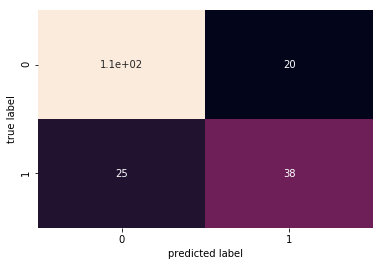

In [249]:
plot_confusion(logr_pipe, x2_test,y2_test)

In [250]:
print("Accuracy: %.3f"% metrics.accuracy_score(y2_test, logr_pipe.predict(x2_test)))
print(metrics.classification_report(y2_test, logr_pipe.predict(x2_test)))

Accuracy: 0.766
             precision    recall  f1-score   support

          0       0.81      0.84      0.83       129
          1       0.66      0.60      0.63        63

avg / total       0.76      0.77      0.76       192



In [252]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve


In [255]:
y2_score=logr_pipe.predict_proba(x2_test)[:,1]

In [256]:
y2_score

array([0.55129513, 0.81357277, 0.98249028, 0.94664802, 0.10678583,
       0.22585103, 0.27779792, 0.37265087, 0.10241806, 0.72051302,
       0.25457206, 0.38066765, 0.42034155, 0.96594562, 0.75091237,
       0.0797112 , 0.10018302, 0.26307254, 0.08584239, 0.04155662,
       0.53791455, 0.16509504, 0.15429654, 0.36363742, 0.11238926,
       0.33084321, 0.86139989, 0.36195781, 0.13365496, 0.33129473,
       0.09930863, 0.30726713, 0.6981125 , 0.63366838, 0.34515449,
       0.4188395 , 0.05423751, 0.22050094, 0.04664521, 0.99990787,
       0.5302017 , 0.02122547, 0.66636305, 0.02080903, 0.47139474,
       0.41586782, 0.08055631, 0.17501757, 0.97443568, 0.04816258,
       0.29963242, 0.29319756, 0.47178097, 0.27502882, 0.72997018,
       0.52044326, 0.04165617, 0.08249082, 0.10898996, 0.60927651,
       0.45705291, 0.04971446, 0.37183192, 0.54942472, 0.02342877,
       0.63217581, 0.55907885, 0.16407921, 0.10312115, 0.11975871,
       0.1689605 , 0.66709553, 0.1250773 , 0.49308103, 0.22392

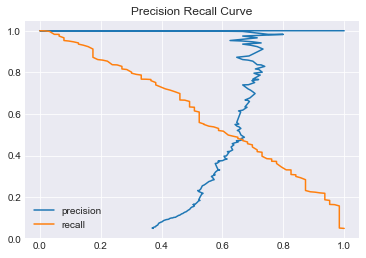

In [450]:
p,r,t=precision_recall_curve(y2_test,y2_score)

    # adding last threshold of '1' to threshold list
t=np.vstack([t.reshape([-1,1]),1])
    
plt.plot(p,t,label='precision')
plt.plot(r,t,label='recall');
plt.legend()
plt.title('Precision Recall Curve');
plt.savefig('precision_recall_curve.pdf')

In [268]:
y2_probs=logr_pipe.predict_proba(x2_test)

In [294]:
y2_predict=[]
for item in y2_probs[:,1]:
    if item >= 0.38:
        y2_predict.append(1)
    else:
        y2_predict.append(0)

In [295]:
y2_test

542    1
378    1
715    1
408    1
492    0
38     1
21     0
34     0
65     0
712    1
63     0
428    0
713    0
661    1
26     1
488    0
581    0
167    0
118    0
149    0
577    1
350    0
442    0
91     0
682    0
369    1
4      1
459    0
758    0
667    1
      ..
282    0
391    1
125    1
12     0
579    1
499    0
110    1
592    1
531    0
303    1
469    0
388    1
709    1
497    0
151    0
562    0
714    0
345    0
393    0
665    0
89     0
418    0
198    1
347    0
111    1
389    0
512    0
453    0
308    1
212    0
Name: outcome, Length: 192, dtype: int64

In [296]:
print(metrics.classification_report(y2_test,y2_predict))

             precision    recall  f1-score   support

          0       0.87      0.76      0.81       129
          1       0.61      0.76      0.68        63

avg / total       0.78      0.76      0.77       192



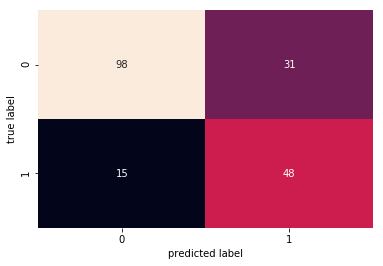

In [298]:

    
    
c_mat = metrics.confusion_matrix(y2_test,y2_predict)
labels = unique(y2_test)
sns.heatmap(
    sqrt(c_mat),
    annot=c_mat,
    xticklabels=labels,
    yticklabels=labels,
    cbar=False);
ylabel("true label")
xlabel("predicted label")
plt.savefig('Confusion_noskin.pdf')

### 0.38 threshold seems to be the optimal threshold for max recall on both classes, now lets take out pregnancy to see if we can make the model sex agnostic

In [303]:
x3=df.drop(['outcome','skinthickness','pregnancies'],axis=1)
y3=df['outcome']

In [304]:
x3_train,x3_test,y3_train,y3_test=model_selection.train_test_split(x3,y3)

In [324]:
logr_pipe.fit(x3_train,y3_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [309]:
logr_pipe.score(x3_test,y3_test) ###whoaaaaaa, let's cv

0.8229166666666666

In [315]:
stratified_kfold_cv(logr_pipe,x3,y3)

'Average Score: 0.7828858162355041'

In [317]:
coefs3=logr_pipe.named_steps['logr'].coef_

In [318]:
logr_pipe_coefs3=dict(zip(x3.columns,coefs3[0]))

In [319]:
logr_pipe_coefs3

{'age': 0.35671182234542637,
 'bloodpressure': -0.031232163383244783,
 'bmi': 0.5649690287654534,
 'diabetespedigreefunction': 0.2959964396148295,
 'glucose': 0.8475208144248024,
 'insulin': 0.43629709847391007}

In [334]:
y3_probs=logr_pipe.predict_proba(x3_test)

In [367]:
y3_predict=[]
for item in y3_probs[:,1]:
    if item >= 0.30:
        y3_predict.append(1)
    else:
        y3_predict.append(0)

In [352]:
print(metrics.classification_report(y3_test,y3_predict))

             precision    recall  f1-score   support

          0       0.90      0.77      0.83       133
          1       0.61      0.80      0.69        59

avg / total       0.81      0.78      0.79       192



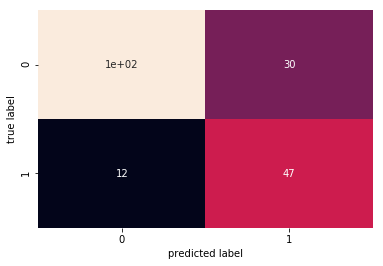

In [353]:
c_mat = metrics.confusion_matrix(y3_test,y3_predict)
labels = unique(y3_test)
sns.heatmap(
    sqrt(c_mat),
    annot=c_mat,
    xticklabels=labels,
    yticklabels=labels,
    cbar=False);
ylabel("true label")
xlabel("predicted label")
plt.savefig('Confusion_noskin_no_preg.pdf')

### when removing pregnancies feature optimal threshold for desired precision/recall is 0.30, now let's take out diabetes pedigree function

In [356]:
x4=df.drop(['outcome','skinthickness','pregnancies','diabetespedigreefunction'],axis=1)
y4=df['outcome']

In [357]:
x4_train,x4_test,y4_train,y4_test=model_selection.train_test_split(x4,y4)

In [474]:
logr_pipe.fit(x4_train,y4_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [475]:
logr_pipe.score(x4_test,y4_test)

0.8125

In [476]:
stratified_kfold_cv(logr_pipe,x4,y4)

'Average Score: 0.7705096793708409'

In [477]:
coefs4=logr_pipe.named_steps['logr'].coef_

In [478]:
logr_pipe_coefs4=dict(zip(x4.columns,coefs4[0]))

In [479]:
logr_pipe_coefs4

{'age': 0.3758291086265928,
 'bloodpressure': -0.14560143698716468,
 'bmi': 0.5660433185979967,
 'glucose': 0.8627581028182907,
 'insulin': 0.9220266141545879}

In [480]:
y4_probs=logr_pipe.predict_proba(x4_test)

In [481]:
y4_predict=[]
for item in y4_probs[:,1]:
    if item >= 0.39:
        y4_predict.append(1)
    else:
        y4_predict.append(0)

In [482]:
print(metrics.classification_report(y4_test,y4_predict))
print(metrics.accuracy_score(y4_test,y4_predict))

             precision    recall  f1-score   support

          0       0.88      0.82      0.85       130
          1       0.67      0.76      0.71        62

avg / total       0.81      0.80      0.80       192

0.8020833333333334


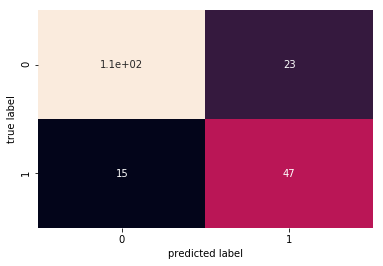

In [374]:
c_mat = metrics.confusion_matrix(y4_test,y4_predict)
labels = unique(y4_test)
sns.heatmap(
    sqrt(c_mat),
    annot=c_mat,
    xticklabels=labels,
    yticklabels=labels,
    cbar=False);
ylabel("true label")
xlabel("predicted label")
plt.savefig('Confusion_noskin_no_preg_no_ped.pdf')

### Alright, so taking out a pedigree function yields similar results, now let's take out insulin and glucose as they are invasive tests

In [376]:
x5=df[['age','bloodpressure','bmi']]
y5=df['outcome']

In [377]:
x5_train,x5_test,y5_train,y5_test=model_selection.train_test_split(x5,y5)

In [378]:
logr_pipe.fit(x5_train,y5_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [379]:
logr_pipe.score(x5_test,y5_test)

0.6666666666666666

In [380]:
stratified_kfold_cv(logr_pipe,x5,y5)

'Average Score: 0.677957181088314'

In [381]:
coefs5=logr_pipe.named_steps['logr'].coef_

In [382]:
logr_pipe_coefs5=dict(zip(x5.columns,coefs5[0]))

In [383]:
logr_pipe_coefs5

{'age': 0.5845707117653919,
 'bloodpressure': -0.0627415448649634,
 'bmi': 0.7899872926359429}

In [384]:
y5_probs=logr_pipe.predict_proba(x5_test)

In [388]:
y5_predict=[]
for item in y5_probs[:,1]:
    if item >= 0.35:
        y5_predict.append(1)
    else:
        y5_predict.append(0)

In [485]:
print(metrics.classification_report(y5_test,y5_predict))
print(metrics.accuracy_score(y5_test,y5_predict))

             precision    recall  f1-score   support

          0       0.77      0.61      0.68       124
          1       0.48      0.66      0.56        68

avg / total       0.67      0.63      0.64       192

0.6302083333333334


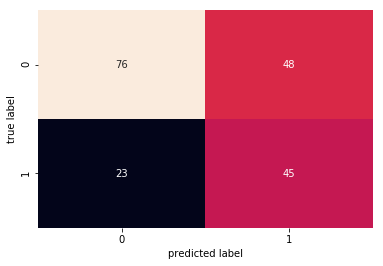

In [390]:
c_mat = metrics.confusion_matrix(y5_test,y5_predict)
labels = unique(y5_test)
sns.heatmap(
    sqrt(c_mat),
    annot=c_mat,
    xticklabels=labels,
    yticklabels=labels,
    cbar=False);
ylabel("true label")
xlabel("predicted label")
plt.savefig('Confusion_noskin_no_preg_no_ped_nogluc_noinsulin.pdf')

### Looks like going to the doctor and getting glucose/insulin test will be the best bet

In [391]:
df[['bmi','skinthickness']].corr()

,bmi,skinthickness
bmi,1.000000,0.565443
skinthickness,0.565443,1.000000


In [394]:
logr_pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [395]:
stratified_kfold_cv(logr_pipe,x,y)

'Average Score: 0.7936932849364793'

In [397]:
coef=logr_pipe.named_steps['logr'].coef_

array([[ 0.44797008,  0.84984388, -0.08120449,  0.49302546,  0.73866076,
         0.36167618,  0.28903919,  0.1867412 ]])

In [413]:
sns.set_style('darkgrid')

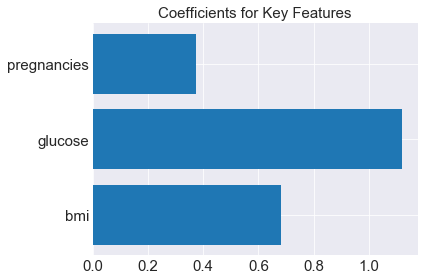

In [470]:
plt.barh(['pregnancies','glucose','bmi'],[0.376,1.12,0.682])
plt.title('Coefficients for Key Features',size=15)
plt.yticks(size=15)
plt.xticks(size=15)
plt.tight_layout()
plt.savefig('coefficients_full.pdf')

In [419]:
logr_pipe_full_coefs

{'age': 0.24322509760853556,
 'bloodpressure': -0.3578015264759849,
 'bmi': 0.6817878297007671,
 'diabetespedigreefunction': 0.4452631989268334,
 'glucose': 1.1220879485482262,
 'insulin': -0.1405535107869312,
 'pregnancies': 0.3768850312370271,
 'skinthickness': -0.07707983594296203}

In [431]:
logr_pipe_coefs4

{'age': 0.3758291086265928,
 'bloodpressure': -0.14560143698716468,
 'bmi': 0.5660433185979967,
 'glucose': 0.8627581028182907,
 'insulin': 0.9220266141545879}

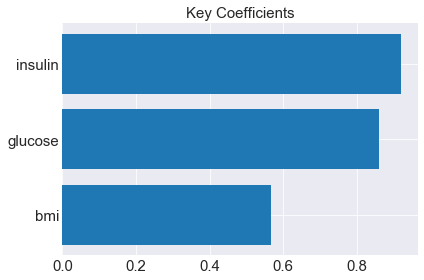

In [484]:
plt.barh(['bmi','glucose','insulin'],[0.566,0.862,0.92])
plt.title('Key Coefficients',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('coefs_no_preg_no_skin_no_pedigree.pdf')

In [438]:
logr_pipe_coefs5

{'age': 0.5845707117653919,
 'bloodpressure': -0.0627415448649634,
 'bmi': 0.7899872926359429}

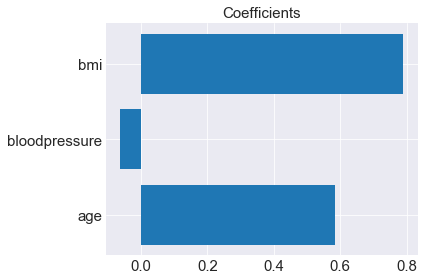

In [486]:
plt.barh(list(logr_pipe_coefs5.keys()),list(logr_pipe_coefs5.values()))
plt.title('Coefficients',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('coefficients_bare.pdf')

In [449]:
print(metrics.classification_report(y_test, logr_pipe.predict(x_test)))

             precision    recall  f1-score   support

          0       0.86      0.88      0.87       131
          1       0.72      0.69      0.71        61

avg / total       0.82      0.82      0.82       192



In [453]:
metrics.accuracy_score(y_test,logr_pipe.predict(x_test))

0.8177083333333334

In [452]:
logr_pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [454]:
y_probs=logr_pipe.predict_proba(x_test)

In [455]:
y_predict=[]
for item in y_probs[:,1]:
    if item >= 0.35:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [457]:
print(metrics.classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.90      0.82      0.86       131
          1       0.67      0.80      0.73        61

avg / total       0.83      0.81      0.82       192



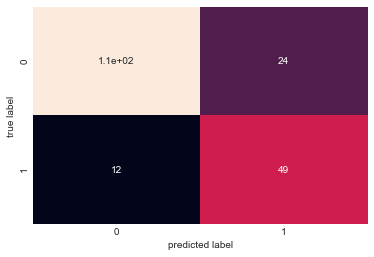

In [458]:
c_mat = metrics.confusion_matrix(y_test,y_predict)
labels = unique(y_test)
sns.heatmap(
    sqrt(c_mat),
    annot=c_mat,
    xticklabels=labels,
    yticklabels=labels,
    cbar=False);
ylabel("true label")
xlabel("predicted label")
plt.savefig('Confusion_full_features.pdf')

In [471]:
df.corr()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.129867,0.208935,0.094172,0.093546,0.024127,-0.033523,0.544341,0.221898
glucose,0.129867,1.000000,0.224356,0.235040,0.497789,0.235253,0.138125,0.268566,0.495954
bloodpressure,0.208935,0.224356,1.000000,0.203453,0.099996,0.286518,-0.002264,0.324439,0.175087
skinthickness,0.094172,0.235040,0.203453,1.000000,0.212573,0.565443,0.102426,0.135916,0.308094
insulin,0.093546,0.497789,0.099996,0.212573,1.000000,0.231533,0.121716,0.165149,0.410918
bmi,0.024127,0.235253,0.286518,0.565443,0.231533,1.000000,0.152530,0.027578,0.315271
diabetespedigreefunction,-0.033523,0.138125,-0.002264,0.102426,0.121716,0.152530,1.000000,0.033561,0.173844
age,0.544341,0.268566,0.324439,0.135916,0.165149,0.027578,0.033561,1.000000,0.238356
outcome,0.221898,0.495954,0.175087,0.308094,0.410918,0.315271,0.173844,0.238356,1.000000


In [504]:
logr_pipe.named_steps['logr'].penalty='l2'

In [505]:
logr_pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [506]:
logr_pipe.score(x_test,y_test)

0.8177083333333334

In [513]:
logr_pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [515]:
x.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33


In [519]:
logr_pipe.predict_proba([[108,69,203,34,72]])

ValueError: operands could not be broadcast together with shapes (1,5) (8,) (1,5) 